# Use the titanic data set for the next set of questions

In [19]:
"""
Find the average Fare paid by Titanic passengers above 
20 years of age categorized by Gender 
"""
import pandas as pd
df=pd.read_csv("C:/Users/805322/Untitled Folder/titanic.csv")
c=(df['Age']>20)
df[c].groupby(['Sex'])[['Fare']].mean()

,Fare
Sex,
female,52.638338
male,27.757062


In [2]:
"""
Find the count of passengers between age group of 20-45 categorized by Gender and Pclass
"""
c=(df['Age'].between(20,45))
df[c].groupby(['Sex','Pclass'])[['PassengerId']].count()

PassengerId
Sex    Pclass             
female 1                51
       2                51
       3                54
male   1                52
       2                64
       3               175

<AxesSubplot:xlabel='Sex', ylabel='count'>

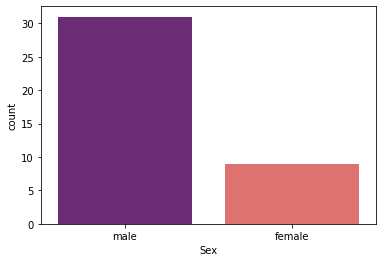

In [3]:
"""
Plot the count of Passengers in Pclass 3 above 40 years of age categorized by Gender
"""
import seaborn as sns
temp=df[(df['Age']>40)&(df['Pclass']==3)]
sns.countplot(x='Sex',
              data=temp,
              palette='magma',
             )

In [4]:
"""
Create a data frame that shows data of first 50 and last 80 passengers in the dataset
"""
df1=df.head(50)
df2=df.tail(80)
pd.concat([df1,df2],axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
"""
show the quantile values of Fare for passengers of Pclass 1 and Pclass 2
"""
import statistics as st
m=df.groupby(['Pclass'])[['Fare']].quantile()
m

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [6]:
d1={
    "City":['Mumbai','New York','London','Tokyo'],
    "Temperature":[27,19,17,28]
}

d2={
    "City":['Mumbai','New York','London','Melbourne'],
    "Humidity":[50,28,40,35]
}

In [7]:
"""
-convert the above dictionaries into data frames with indices set as 1,2,3,4,5 and 3,4,2,1,5
for the second frame
"""
df1=pd.DataFrame(d1,index=[1,2,3,4])
df2=pd.DataFrame(d2,index=[3,4,2,1])

In [8]:
df1

,City,Temperature
1,Mumbai,27
2,New York,19
3,London,17
4,Tokyo,28


In [9]:
df2

,City,Humidity
3,Mumbai,50
4,New York,28
2,London,40
1,Melbourne,35


In [10]:
"""
-find the average temperature for cities common in 2 frames
"""
df3=df1.merge(df2,on="City",how='inner')
df3[['Temperature']].agg(['mean'])

,Temperature
mean,21.0


In [11]:
"""
-find the city with maximum temperature
"""
df3[['City']].agg(['max'])

,City
max,New York


In [12]:
"""
-show records of cities which are not common in 2 frames
"""
common = df1.merge(df2,on=['City'])
# print(common)
t1 = (df1[(~df1.City.isin(common.City))])
t2 = (df2[(~df2.City.isin(common.City))])
 
print(pd.concat([t1,t2])[['City']])

        City
4      Tokyo
1  Melbourne


# Use the Yesbank data set for the next set of questions

In [22]:
"""
Find the average Opening price in the month of January year for all years in the data set
"""
df=pd.read_csv('https://raw.githubusercontent.com/harshit3610/TataSteelsTraining/main/YESBANK.NS.csv',\
               parse_dates=['Date'],index_col='Date')df.roupby(df.index.month_name())[['Open']].resample('M').mean().loc[['Janu
ary']].dropna()

Open
Date    Date                  
January 2018-01-31  340.177274
        2019-01-31  197.308696
        2020-01-31   42.582609

In [14]:
"""
Find the month in which the lowest average Adjusted Closing price was obeserved
"""
m=df.groupby(df.index.month_name())[['Adj Close']].mean()
c=m[['Adj Close']].min()
m[(m['Adj Close']==c[0])]

,Adj Close
Date,
October,91.007707


In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-11,313.500000,315.799988,310.600006,311.600006,300.880615,4416465.0
2017-12-12,312.000000,312.000000,305.899994,306.799988,296.245758,5457103.0
2017-12-13,306.350006,307.350006,301.049988,301.899994,291.514282,6911856.0
2017-12-14,303.899994,304.649994,301.750000,303.899994,293.445526,4904177.0
2017-12-15,307.000000,317.450012,307.000000,315.899994,305.032715,20571225.0
...,...,...,...,...,...,...
2020-12-02,15.700000,15.900000,14.850000,15.450000,15.450000,311349886.0
2020-12-03,15.650000,15.800000,15.250000,15.450000,15.450000,152445535.0
2020-12-04,15.600000,15.600000,15.050000,15.350000,15.350000,149691622.0


<AxesSubplot:xlabel='Date', ylabel='Close'>

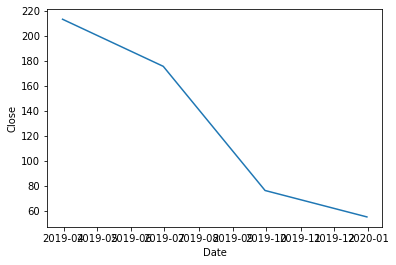

In [16]:
"""
Plot a line plot to show the trend in average Close price every quarter in the year 2019
"""
newdf=df.loc['2019'][['Close']].resample('Q').mean()
sns.lineplot(x='Date',y='Close',data=newdf)

<AxesSubplot:xlabel='Open', ylabel='Close'>

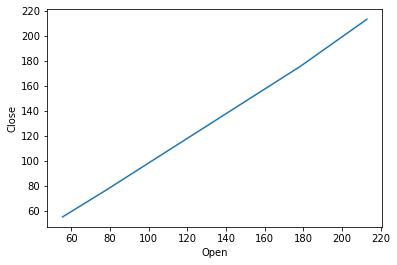

In [17]:
"""
plot a graph to show the relationship between Open and closing price for every quarter in 
2019
"""
newdf=df.loc['2019'][['Open','Close']].resample('Q').mean()

sns.lineplot(x='Open',y='Close',data=newdf)

In [20]:
"""
Show the count of passengers distributed by their Embarked location as a multiplot
"""
df1=df.groupby(['Embarked'])[['PassengerId']].count()
df1
#sns.countplot(x='Embarked',data=df1,hue='Embarked' )

,PassengerId
Embarked,
C,168
Q,77
S,644


In [23]:
"""
Prove statistically & graphically that average closing price was higher in 2018 than in 2019
"""
df[['Close']].resample('y').mean().loc['2018':'2019'].dropna()

,Close
Date,
2018-12-31,301.502438
2019-12-31,129.688223


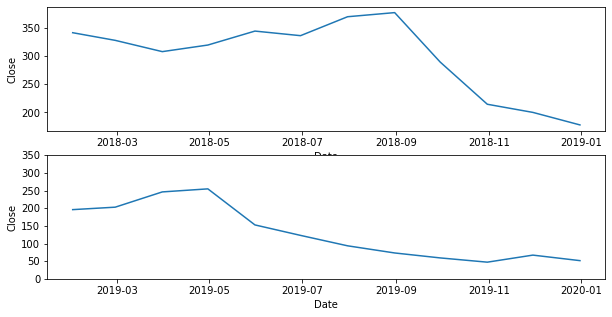

In [24]:
import matplotlib.pyplot as plt

df1=df[['Close']].resample('M').mean().loc['2018']
df2=df[['Close']].resample('M').mean().loc['2019']

fig , ax =  plt.subplots( 2,1,figsize=(10,5) )

sns.lineplot(x='Date',y='Close',data=df1,  ax=ax[0] )

sns.lineplot(x='Date',y='Close',data=df2,  ax=ax[1] )
plt.yticks( [  num for num in range(0,400,50) ]  )

plt.show()

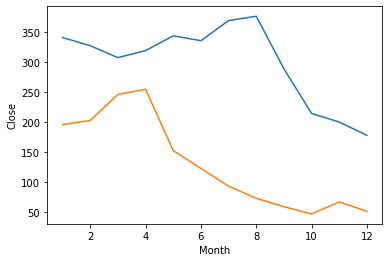

In [46]:
df1=df[['Close']].resample('M').mean().loc['2018']
df2=df[['Close']].resample('M').mean().loc['2019']

df1['Month']=pd.DatetimeIndex(df1.index).month
df2['Month']=pd.DatetimeIndex(df2.index).month

sns.lineplot(x='Month',y='Close',data=df1)
sns.lineplot(x='Month',y='Close',data=df2)

df1.drop('Month',inplace=True,axis=1)
df2.drop('Month',inplace=True,axis=1)